<a href="https://colab.research.google.com/github/ziadashraf0/Text-Classification/blob/master/textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
from urllib.request import urlopen
link = "https://drive.google.com/uc?export=download&id=11eD4SVdiwQDKbGa1XZkfsVBULJL7vR7g"
testlink = "https://drive.google.com/uc?export=download&id=1L1jwMZEIuE1JaLGA00sV2an4L1N0uJio"
print(testlink)

f = urlopen(link)
testData = urlopen(testlink)
testSet = testData.read().decode("utf-8").split("\n")
print(len(testSet))


dataset = f.read().decode("utf-8").split("\n")
testDataSet=[]
data=[]
for i in range(len(dataset)):
      data.append(dataset[i].split('\t'))
for i in range(len(testSet)):
      testDataSet.append(testSet[i].split('\t'))

data.pop()
testDataSet.pop()



https://drive.google.com/uc?export=download&id=1L1jwMZEIuE1JaLGA00sV2an4L1N0uJio
859


['" More specifically , Article I , Section 8 , empowers Congress to establish a post office , build roads , regulate commerce , coin money , and regulate the value of money ."',
 '"0"']

In [0]:
# data pre processing
# import nltk 
import string 
import re 
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
# Using the stopwords.
from nltk.corpus import stopwords
# Initialize the stopwords
stoplist = stopwords.words('english')





def text_lowercase(text): 
    return text.lower() 
  
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result 
# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('','', string.punctuation) 
    return text.translate(translator)
# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split())
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = stoplist
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 
    
for i in range(len(data)):
    data[i][0]=text_lowercase(data[i][0])
    data[i][0]=remove_numbers(data[i][0])
    data[i][0]=remove_punctuation(data[i][0])
    data[i][1]=remove_punctuation(data[i][1])
    data[i][0]=remove_whitespace(data[i][0])
    data[i][0]=remove_stopwords(data[i][0])
    
    
    for j in range(len(data[i][0])):    
              data[i][0][j]=lemmatize_word(data[i][0][j])[0]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
features=[]
labels=[]
temp=[]
print(len(data))   
for i in range(len(data)):
         features.append(data[i][0][0])
         for j in range(1,len(data[i][0])):
            if(data[i][0][j]== "”" or data[i][0][j]=="“" or data[i][0][j]=="link" or data[i][0][j]=="—"  or data[i][0][j]=="’"):
                continue
            else:    
                features[i]=features[i]+" "
                features[i]=features[i]+data[i][0][j]
         labels.append(data[i][1])  
        #  print(i)     
        #  print(features[i])   
        #  print(labels[i])
 

18051


In [0]:
for i in range(len(testDataSet)):
    testDataSet[i][0]=text_lowercase(testDataSet[i][0])
    testDataSet[i][0]=remove_numbers(testDataSet[i][0])
    testDataSet[i][0]=remove_punctuation(testDataSet[i][0])
    testDataSet[i][1]=remove_punctuation(testDataSet[i][1])
    testDataSet[i][0]=remove_whitespace(testDataSet[i][0])
    testDataSet[i][0]=remove_stopwords(testDataSet[i][0])
    for j in range(len(testDataSet[i][0])):    
              testDataSet[i][0][j]=lemmatize_word(testDataSet[i][0][j])[0] 
    # print(testDataSet[i])

In [0]:
testFeatures=[]
testLabels=[]
temp=[]
# print(len(testDataSet))   
for i in range(len(testDataSet)):
         print(i)
         testFeatures.append(testDataSet[i][0][0])
         for j in range(1,len(testDataSet[i][0])):
            if(testDataSet[i][0][j]== "”" or testDataSet[i][0][j]=="“" or testDataSet[i][0][j]=="link" or testDataSet[i][0][j]=="—"  or testDataSet[i][0][j]=="’"):
                continue
            else:    
                testFeatures[i]=testFeatures[i]+" "
                testFeatures[i]=testFeatures[i]+testDataSet[i][0][j]
         testLabels.append(testDataSet[i][1])  
        #  print(i)     
        #  print(testFeatures[i])   
        #  print(testLabels[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
from sklearn import model_selection, preprocessing,naive_bayes, metrics, svm ,linear_model
from sklearn.feature_extraction.text import  CountVectorizer
import pandas
trainDF = pandas.DataFrame() #transforming to pandas data frame 
testDF = pandas.DataFrame() #transforming to pandas data frame 
testDF['features'] = testFeatures
testDF['labels'] = testLabels
trainDF['features'] = features
trainDF['labels'] = labels
print(trainDF)
#train_x=trainDF['features']
test_x=testDF['features'] 
#train_y=trainDF['labels']
test_y=testDF['labels']
print(len(test_y))

train_x, realValid_x, train_y, realValid_y = model_selection.train_test_split(trainDF['features'], trainDF['labels']) #split the data around 80/20 70/30
encoder = preprocessing.LabelEncoder() 
#train_y = encoder.fit_transform(trainDF['labels'])
# print(train_y>1)
trainLabels = np.array(train_y).astype(int)
testLabels =  np.array(test_y).astype(int)
####validation
realValidLabels = np.array(realValid_y).astype(int)

############ Feature extraction
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}') 
print(trainDF['features'][0])
count_vect.fit(train_x)
#vect
trainFeatures =  count_vect.transform(train_x)
testTrainFeatures =  count_vect.transform(test_x)
realValidTrainFeatures =  count_vect.transform(realValid_x)
print(count_vect.vocabulary_)

#print(xtrain_count)

                                                features labels
0      science include diverse field astronomy biolog...      0
1      however field science relate physical world ph...      1
2      thus museum natural sciences might contain ite...      0
3      deductive reason pattern think move opposite d...      0
4      deductive reason form logical think use genera...      1
...                                                  ...    ...
18046  twenty first century especially september atta...      0
18047  although title vii civil right act prevent emp...      0
18048  often source controversy wear head cover obser...      0
18049  “ combat religious discrimination protect reli...      0
18050  hate crimes muslims also increase since many m...      0

[18051 rows x 2 columns]
858
science include diverse field astronomy biology computer sciences geology logic physics chemistry mathematics
{'attractive': 1011, 'force': 5275, 'molecules': 8857, 'type': 14304, 'call': 1797, 'cohesiv

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
#IDF(t) = log_e(Total number of documents / Number of documents with term t in it)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_x)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)
realXvalid_tfidf =  tfidf_vect.transform(realValid_x)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

def train_model(classifier, feature_vector_train, label, feature_vector_valid,validationFeatures):
    classifier.fit(feature_vector_train, label) #fit and train the features
    predictions = classifier.predict(feature_vector_valid) # predict the labels of the validation
    validationpredictions = classifier.predict(validationFeatures) # predict the labels of the validation
 

    print("ValidationPrecision :", precision_score(validationpredictions, realValidLabels,average='weighted'))
    print("Validation Recall :", recall_score(validationpredictions,  realValidLabels,average='weighted'))
    print("Validation F1 :", f1_score(validationpredictions,  realValidLabels,average='weighted'))
   
    cm= confusion_matrix(testLabels,predictions)
    # print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAA",testLabels.shape)
    disp = plot_confusion_matrix(classifier, feature_vector_valid, testLabels) 
    plt.show();  
    # print("sklearn Confusion Matrix A:\n", confusion_matrix(predictions, validLabels))
    print("Precision :", precision_score(predictions, testLabels,average='weighted'))
    print("Recall :", recall_score(predictions, testLabels,average='weighted'))
    print("F1 :", f1_score(predictions, testLabels,average='weighted'))

    return metrics.accuracy_score(predictions, testLabels) # accuracy prediction vs true labels


ValidationPrecision : 0.6984386817482602
Validation Recall : 0.7028584090405495
Validation F1 : 0.7001823061408518


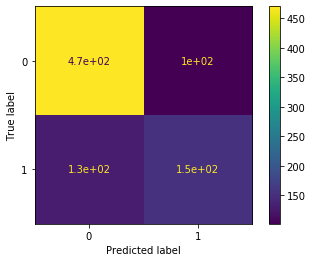

Precision : 0.7371754120005868
Recall : 0.7272727272727273
F1 : 0.7313359396564385
naieve bayes Word Counting accuracy is ===============>, 0.7272727272727273

ValidationPrecision : 0.7948135569484626
Validation Recall : 0.7103922003102149
Validation F1 : 0.7385848873112599


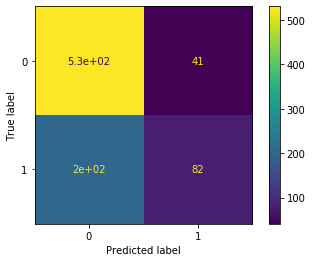

Precision : 0.8363428529512447
Recall : 0.7144522144522144
F1 : 0.7535465509118755
Naieve Bay 's WordLevel TF-IDF:  0.7144522144522144

ValidationPrecision : 0.7507983656433803
Validation Recall : 0.7314424994460448
Validation F1 : 0.7387634972113983


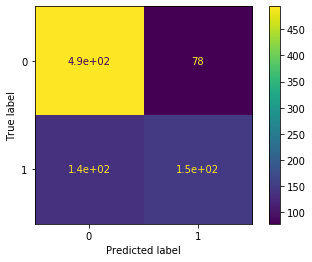

Precision : 0.7729799338190947
Recall : 0.7494172494172494
F1 : 0.7576821814473298
Linear Regression WordCounting  0.7494172494172494

ValidationPrecision : 0.7927234292645282
Validation Recall : 0.7212497230223798
Validation F1 : 0.7448466803894485


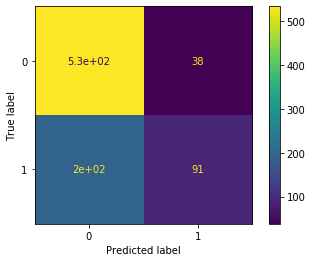

Precision : 0.8410435718128024
Recall : 0.7284382284382285
F1 : 0.7634203881742847
Linear Regression Word Level TF-IDF  0.7284382284382285


In [0]:
from sklearn import decomposition, ensemble
from sklearn.linear_model import LinearRegression

accuracy = train_model(naive_bayes.MultinomialNB(), trainFeatures, trainLabels, testTrainFeatures,realValidTrainFeatures)
print("naieve bayes Word Counting accuracy is ===============>,", accuracy)
print("")
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, trainLabels, xtest_tfidf,realXvalid_tfidf)
print("Naieve Bay 's WordLevel TF-IDF: ", accuracy)
print("")

accuracy = train_model(linear_model.LogisticRegression(), trainFeatures, trainLabels, testTrainFeatures,realValidTrainFeatures)
print("Linear Regression WordCounting ", accuracy)
print("")

accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, trainLabels, xtest_tfidf,realXvalid_tfidf)
print("Linear Regression Word Level TF-IDF ", accuracy)